# Diabetes Prediction

In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/diabetes_prediction_dataset.csv', dtype={"blood_glucose_level": int})
# Columns are:
# gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes

## Data Preprocessing

First, we will convert the data into numerical format.

In [2]:
# Convert gender to integers
# 0 = male; 1 = female; 2 = other
genger_to_int = {"Male": 0, "Female": 1, "Other": 2}
df["gender"] = df["gender"].replace(genger_to_int)

# Convert smoking_history to integers
# No Info = 0; never = 1; former = 2; not current = 3; current = 4; ever = 5
smoking_to_int = {"No Info": 0, "never": 1, "former": 2, "not current": 3, "current": 4, "ever": 5}
df["smoking_history"] = df["smoking_history"].replace(smoking_to_int)

# Print data type of each column
print(df.dtypes)

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


# Data Exploration

We can now explore the data to understand the distribution of the features and their correlation with the target variable, diabetes.

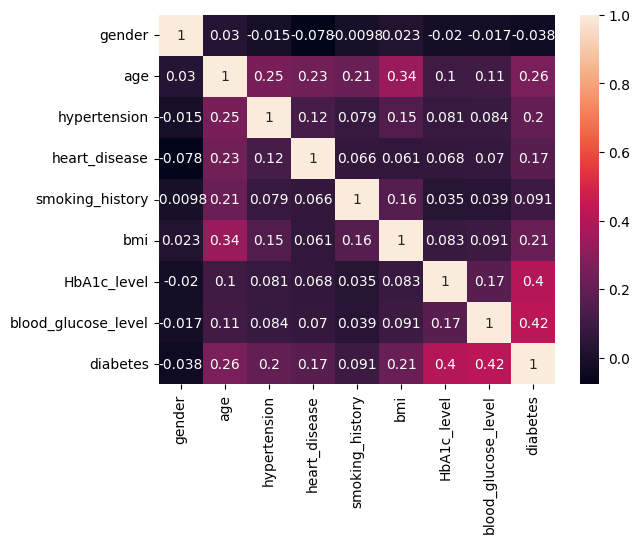

In [45]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

We can see that the features most correlated with diabetes are HbA1c, Glucose, BMI, and Age.

We can visualize how HbA1c and glucose levels are distributed for patients with and without diabetes.

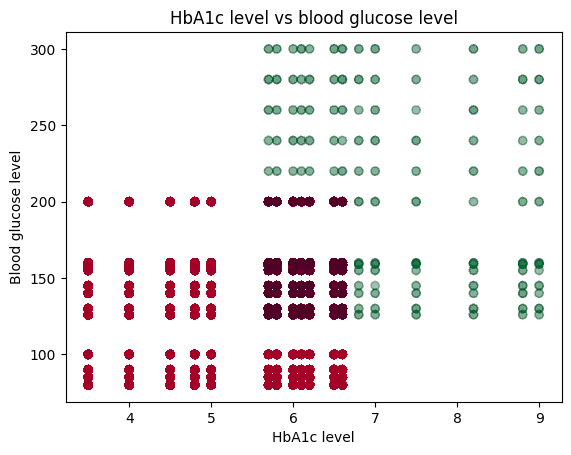

In [83]:
# Show HbA1c level vs blood glucose level
plt.scatter(df["HbA1c_level"], df["blood_glucose_level"], c=df["diabetes"], cmap="RdYlGn", alpha=0.01)
plt.xlabel("HbA1c level")
plt.ylabel("Blood glucose level")
plt.title("HbA1c level vs blood glucose level")
plt.show()

This shows that we can use a decision tree to predict diabetes, with fairly obvious decision boundaries and only a small portion of overlap between the two classes leading to misclassification.

## Random Forest Models

### Building up a Random Forest Classifier

Based on the above, we will use a Random Forest Classifier to predict diabetes based on HbA1c and Glucose levels. Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy of the model.

Accuracy:  0.9726


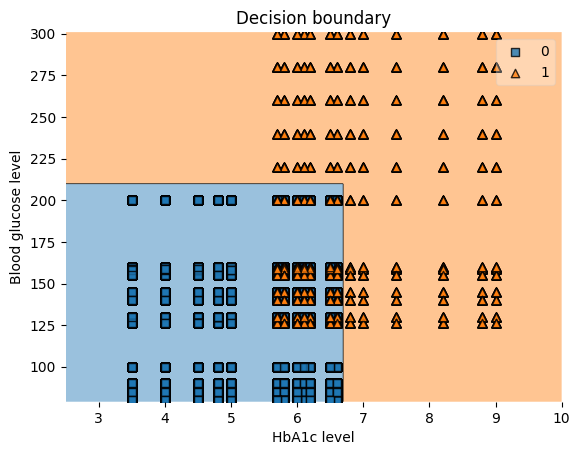

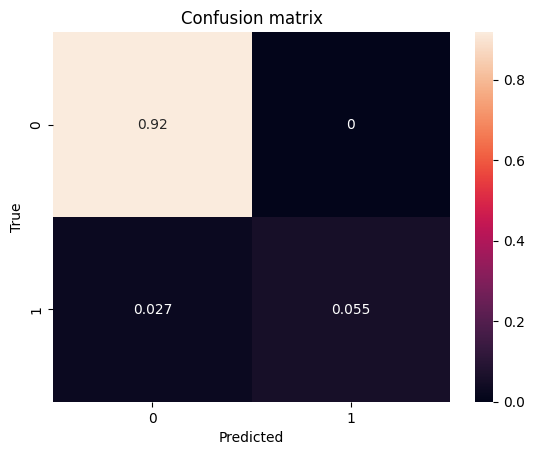

False negative rate:  0.33414634146341465
False positive rate:  0.0


In [121]:
# X is only HbA1c level and blood glucose level
X = df[["HbA1c_level", "blood_glucose_level"]].values
y = df["diabetes"].values

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf)
plt.xlabel("HbA1c level")
plt.ylabel("Blood glucose level")
plt.title("Decision boundary")
plt.show()

# Confusion matrix scaled down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

# Print false positives and false negatives rates
tn, fp, fn, tp = cm.ravel()
print("False negative rate: ", fn / (fn + tp))
print("False positive rate: ", fp / (fp + tn))

We can then build on this model, introducing BMI as a new feature. First, visualize the diabetes rate in different BMI ranges.

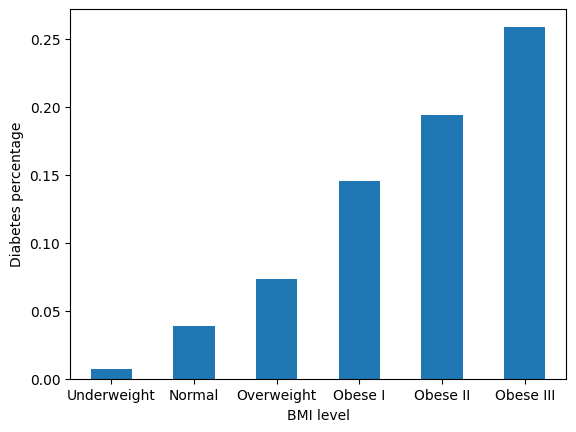

In [139]:
# Show diabetes percentage broken down by BMI level
# Use bins to group BMI levels
bins = [0, 18.5, 25, 30, 35, 40, 100]
labels = ["Underweight", "Normal", "Overweight", "Obese I", "Obese II", "Obese III"]
bmi_diabetes = df.groupby(pd.cut(df["bmi"], bins=bins, labels=labels))["diabetes"].mean()
bmi_diabetes.plot(kind="bar")
plt.ylabel("Diabetes percentage")
plt.xlabel("BMI level")
plt.xticks(rotation=0)
plt.show()


We now add this feature to the Random Forest model and evaluate its performance.

Accuracy:  0.961


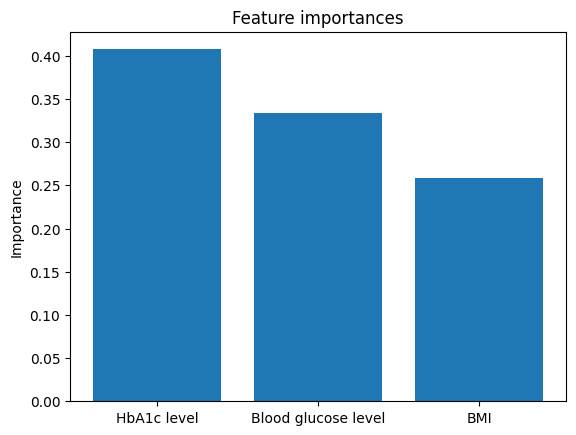

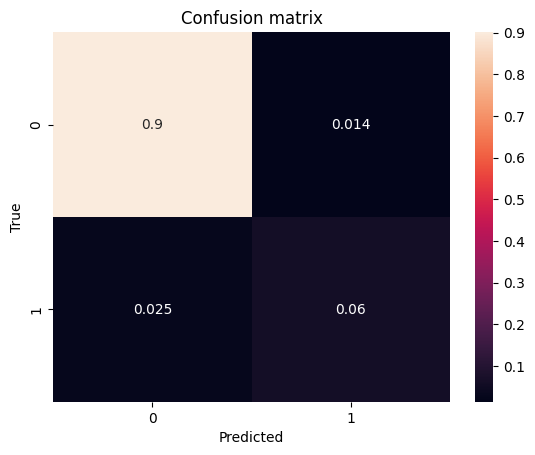

False negative rate:  0.29470588235294115
False positive rate:  0.015245901639344262


In [124]:
# X is HbA1c level, blood glucose level, and BMI
X = df[["HbA1c_level", "blood_glucose_level", "bmi"]].values
y = df["diabetes"].values

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show feature importances
importances = clf.feature_importances_
features = ["HbA1c level", "Blood glucose level", "BMI"]
plt.bar(features, importances)
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

# Confusion matrix scaled down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

# Print false positives and false negatives rates
tn, fp, fn, tp = cm.ravel()
print("False negative rate: ", fn / (fn + tp))
print("False positive rate: ", fp / (fp + tn))

As you can see, all of these models so far have high accuracy, but have a significant false negative rate. We will add all features to the model to see if we can improve this, and if not, take further steps to address this issue.

We now add all features to the Random Forest model and evaluate its performance.

Accuracy:  0.9684


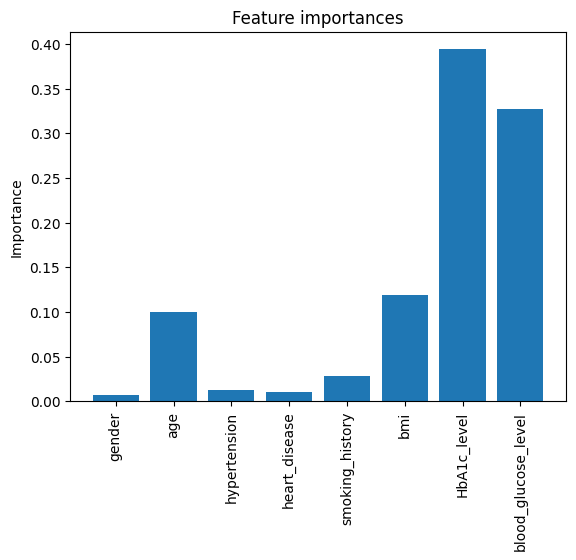

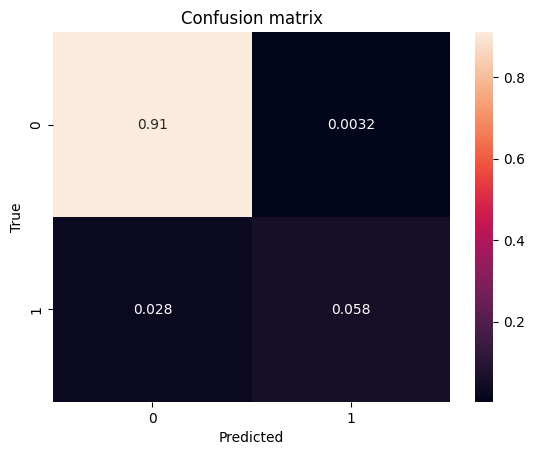

False negative rate:  0.3275563258232236
False positive rate:  0.0035579396792380534


In [114]:
# X is all columns except diabetes
X = df.drop("diabetes", axis=1).values
y = df["diabetes"].values

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show feature importances
importances = clf.feature_importances_
features = df.columns[:-1]
plt.bar(features, importances)
plt.ylabel("Importance")
plt.title("Feature importances")
plt.xticks(rotation=90)
plt.show()

# SHow confusion matrix scaled down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

# Print false negative and false positive rates
tn, fp, fn, tp = cm.ravel()
print("False negative rate: ", fn / (fn + tp))
print("False positive rate: ", fp / (fp + tn))

### Addressing the False Negative Rate

We still have a high accuracy, but the false negative rate is still significant. We will use PCA to reduce the dimensionality of the data to 2 dimensions so we can visualize the data and see if we can improve the model.

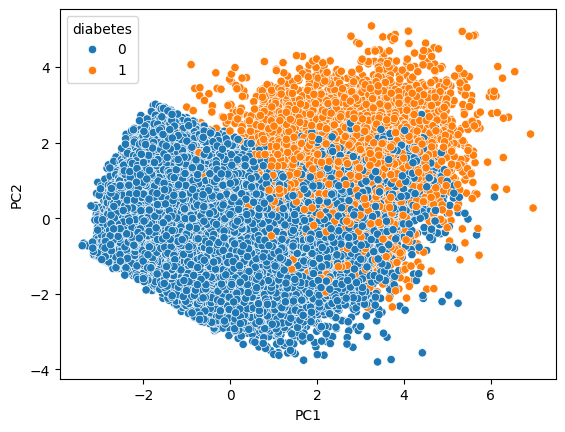

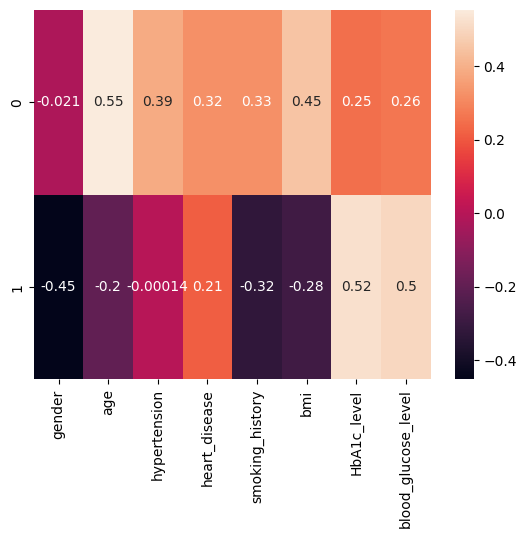

Accuracy:  0.9316


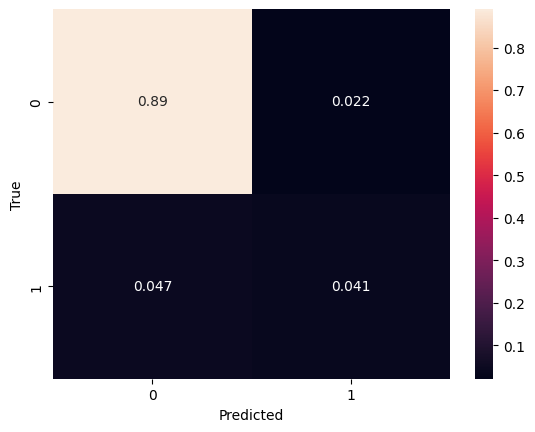

False positive rate:  0.02363456898442641
False negative rate:  0.5311791383219955


In [137]:
# PCA with 2 components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop("diabetes", axis=1)
y = df["diabetes"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca["diabetes"] = y
sns.scatterplot(x="PC1", y="PC2", hue="diabetes", data=X_pca)
plt.show()

# Describe the principal components
components = pd.DataFrame(pca.components_, columns=X.columns)
sns.heatmap(components, annot=True)
plt.show()

# Use random forest classifier
X = X_pca.drop("diabetes", axis=1).values
y = X_pca["diabetes"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show confusion matrix, scaling down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print false negative and false positive rates
tn, fp, fn, tp = cm.ravel()
print("False positive rate: ", fp / (fp + tn))
print("False negative rate: ", fn / (fn + tp))


We can see that we get similar accuracy to the previous model by using only 2 principal components. However, by looking at the confusion matrix, we see that we still have a very high false negative rate. This is not ideal for a medical diagnosis. When we visualize the data with only 2 principle components, we see that it is not easily separable, which is why we have a high false negative rate.

The dataset is unbalanced, with many more negative samples than positive ones. This is likely why the model is performing poorly with false negatives. To try to reduce our false negative rate, we can use SMOTE to oversample the minority class and balance the dataset, then use Random Forest again to predict diabetes.

Original class distribution:  [91500  8500]
Resampled class distribution:  [91500 91500]
Accuracy:  0.9828688524590163


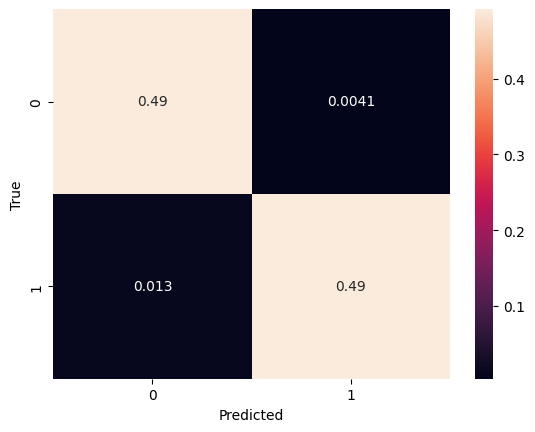

False positive rate:  0.008209818722794644
False negative rate:  0.025906454934691885


In [126]:
# Use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop("diabetes", axis=1).values
y = df["diabetes"].values
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Original class distribution: ", np.bincount(y))
print("Resampled class distribution: ", np.bincount(y_resampled))

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Use random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show confusion matrix, scaling down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print false negative and false positive rates
tn, fp, fn, tp = cm.ravel()
print("False positive rate: ", fp / (fp + tn))
print("False negative rate: ", fn / (fn + tp))

By balancing the dataset, we can see that we have a much lower false negative rate. So far, this is a much better model for predicting diabetes.

### Preventing Overfitting

We can visualize the decision boundaries of the Random Forest model to see how it is making predictions. We will again reduce the dimensionality of the data using PCA to 2 dimensions.

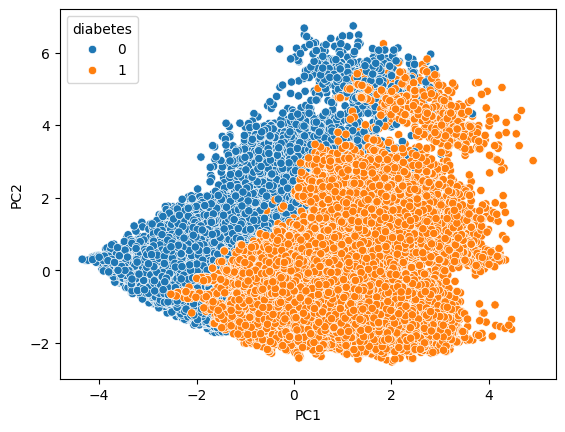

Accuracy:  0.8847267759562841


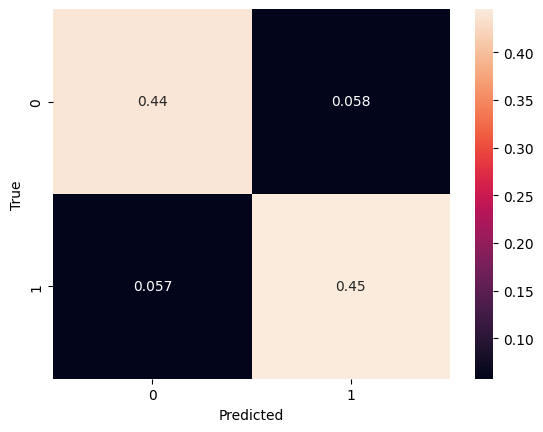

False positive rate:  0.11623818940892111
False negative rate:  0.11431833007175472


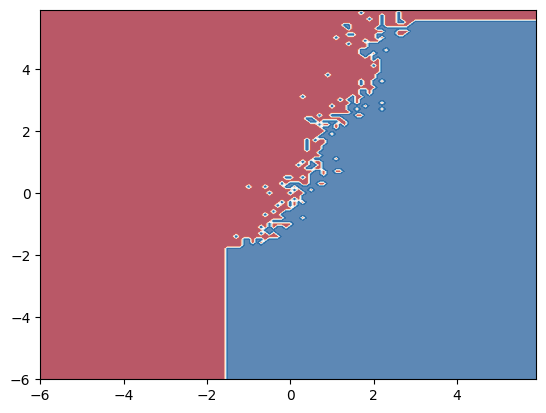

In [9]:
# PCA on resampled data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop("diabetes", axis=1)
y = df["diabetes"]
X_resampled, y_resampled = smote.fit_resample(X, y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca["diabetes"] = y_resampled
sns.scatterplot(x="PC1", y="PC2", hue="diabetes", data=X_pca)
plt.show()

# Use random forest
X = X_pca.drop("diabetes", axis=1).values
y = X_pca["diabetes"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show confusion matrix, scaling down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print false negative and false positive rates
tn, fp, fn, tp = cm.ravel()
print("False positive rate: ", fp / (fp + tn))
print("False negative rate: ", fn / (fn + tp))

# Show decision boundary
# Create a meshgrid
x_min, x_max = -6, 6
y_min, y_max = -6, 6
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.7)
plt.show()


With 2 principle compoments, we maintain a high accuracy and somewhat lower false negative rate. However, the decision boundary is extremely complex, meaning that the model is likely overfitting. To reduce overfitting, we can perform hyperparameter tuning on the Random Forest model. First, we will increase the number of trees in the forest from 100 to 200. This increases computational time, but can improve the model's performance. Next, we will reduce the maximum depth of the trees from 10 to 5. This will make the trees less complex and reduce overfitting.

First, with all features:

Accuracy:  0.9090437158469945


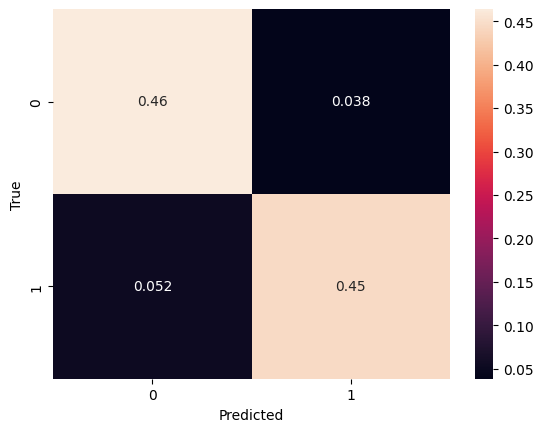

False positive rate:  0.0765800065267051
False negative rate:  0.10546832107170308


In [12]:
# Tuned random forest on resampled data
X = df.drop("diabetes", axis=1)
y = df["diabetes"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=5)
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show confusion matrix, scaling down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print false negative and false positive rates
tn, fp, fn, tp = cm.ravel()
print("False positive rate: ", fp / (fp + tn))
print("False negative rate: ", fn / (fn + tp))


### Final Model

Now using PCA to reduce the dimensionality of the data to 2 dimensions for better visualization:

Accuracy:  0.8661748633879781


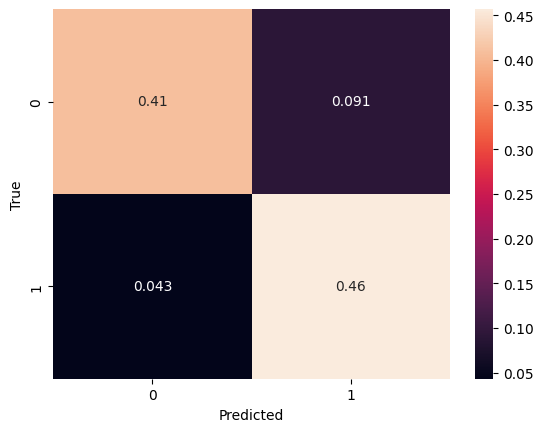

False positive rate:  0.18145536055983819
False negative rate:  0.08624173903544705


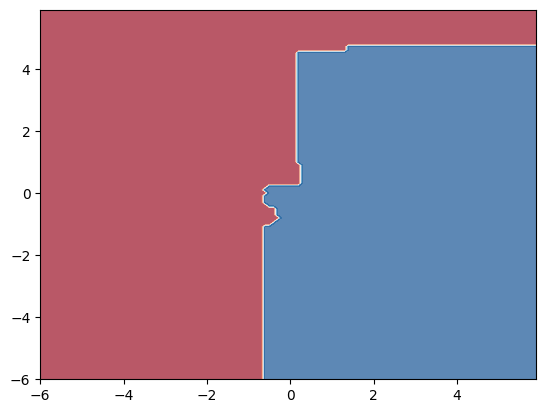

In [15]:
# Tuned random forest on resampled data with PCA
X = df.drop("diabetes", axis=1)
y = df["diabetes"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=5)
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

# Show confusion matrix, scaling down to 0-1
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print false negative and false positive rates
tn, fp, fn, tp = cm.ravel()
print("False positive rate: ", fp / (fp + tn))
print("False negative rate: ", fn / (fn + tp))

# Show decision boundary
# Create a meshgrid
x_min, x_max = -6, 6
y_min, y_max = -6, 6
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.7)
plt.show()

When we rebalance the data and use a tuned random forest model, we get fairly high accuracy and a relatively low false negative rate. This model does not have the highest accuracy of any previous model, nor the lowest false negative rate. However, it has a good balance of the two, and has a simpler decision boundary when reduced to 2 principle components, meaning that it is not overfitting as much. Thus, if we were to deploy a model to predict diabetes, this would likely be the best model to use of the ones created.